In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [27]:
ci = pd.read_csv('Census Income.csv')

In [37]:
ci.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [38]:
print('Rows: {} Columns: {}'.format(dataset.shape[0], dataset.shape[1]))

Rows: 32560 Columns: 15


In [39]:
ci.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [40]:
ci.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,32560.0,38.581634,13.640642,17.0,28.0,37.0,48.0,90.0
Fnlwgt,32560.0,189781.814373,105549.764924,12285.0,117831.5,178363.0,237054.5,1484705.0
Education_num,32560.0,10.080590,2.572709,1.0,9.0,10.0,12.0,16.0
Capital_gain,32560.0,1077.615172,7385.402999,0.0,0.0,0.0,0.0,99999.0
Capital_loss,32560.0,87.306511,402.966116,0.0,0.0,0.0,0.0,4356.0
Hours_per_week,32560.0,40.437469,12.347618,1.0,40.0,40.0,45.0,99.0


In [42]:
ci.isna().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [43]:
print("Before removing duplicates:", ci.duplicated().sum())

ci = ci[~ci.duplicated()]

print("After removing duplicates:", ci.duplicated().sum())

Before removing duplicates: 24
After removing duplicates: 0


In [49]:
ci.Workclass.value_counts()

 Private             22673
 Self-emp-not-inc     2540
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

In [50]:
ci.Sex.value_counts()

 Male      21774
 Female    10762
Name: Sex, dtype: int64

In [51]:
columns = ['Workclass', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country', 'Income']
for column in columns:
    ci[column] = ci[column].str.strip()

In [52]:
ci.Sex.value_counts()

Male      21774
Female    10762
Name: Sex, dtype: int64

In [54]:
ci.Workclass.value_counts()

Private             22673
Self-emp-not-inc     2540
Local-gov            2093
?                    1836
State-gov            1297
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: Workclass, dtype: int64

In [55]:
ci.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32536.000000,3.253600e+04,32536.000000,32536.000000,32536.000000,32536.000000
mean,38.585536,1.897843e+05,10.081725,1078.410069,87.370912,40.440343
std,13.638193,1.055563e+05,2.571622,7388.068465,403.107737,12.347079
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.369932e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


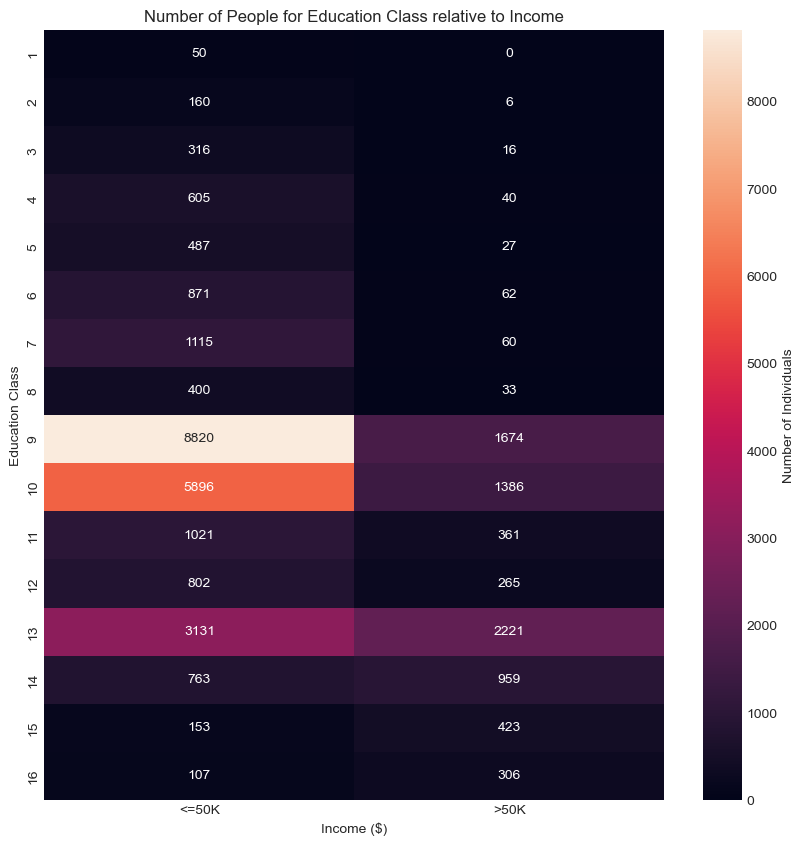

In [62]:
import seaborn as sb

plt.figure(figsize=[10,10])
 
ct_counts = ci.groupby(['Education_num', 'Income']).size()
ct_counts = ct_counts.reset_index(name = 'count')
ct_counts = ct_counts.pivot(index = 'Education_num', columns = 'Income', values = 'count').fillna(0)

sb.heatmap(ct_counts, annot = True, fmt = '.0f', cbar_kws = {'label' : 'Number of Individuals'})
plt.title('Number of People for Education Class relative to Income')
plt.xlabel('Income ($)')
plt.ylabel('Education Class');

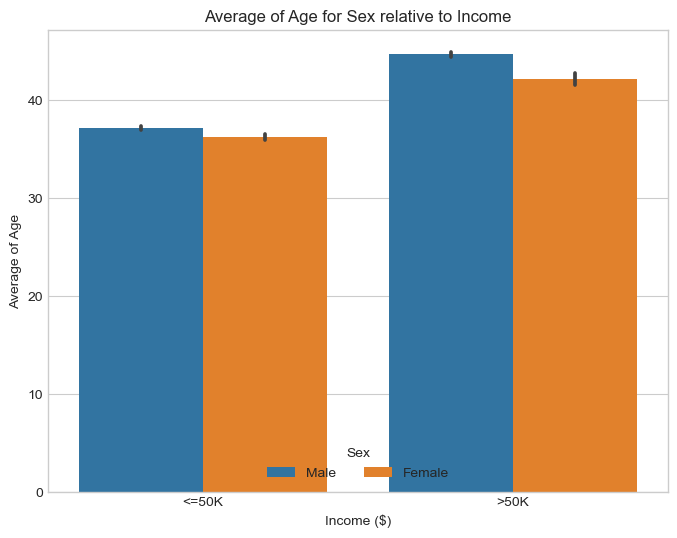

In [65]:
plt.figure(figsize=[8,6])
ax = sb.barplot(data = ci, x = 'Income', y = 'Age', hue = 'Sex')
ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'Sex')
plt.title('Average of Age for Sex relative to Income')
plt.xlabel('Income ($)')
plt.ylabel('Average of Age');

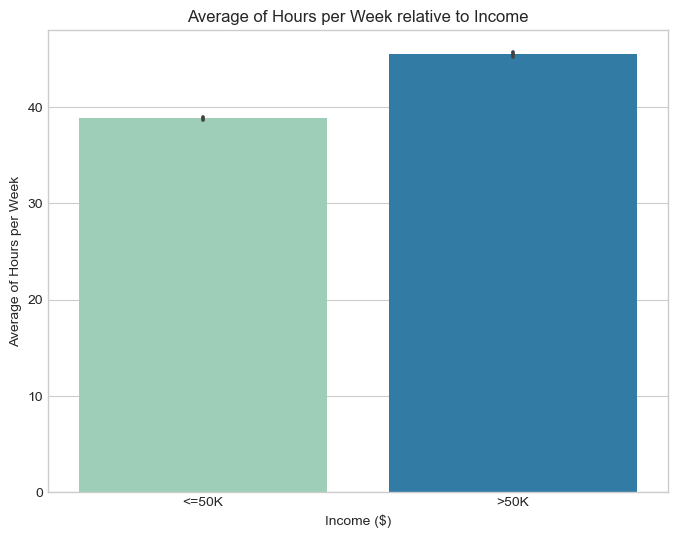

In [67]:
plt.figure(figsize=[8,6])
sb.barplot(data=ci, x='Income', y='Hours_per_week', palette='YlGnBu')
plt.title('Average of Hours per Week relative to Income')
plt.xlabel('Income ($)')
plt.ylabel('Average of Hours per Week');

In [72]:
ci_prep = ci.copy()

In [75]:
from sklearn.preprocessing import MinMaxScaler
numerical = ['Age', 'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Fnlwgt']

scaler = MinMaxScaler()
ci_prep[numerical] = scaler.fit_transform(ci_prep[numerical])

In [76]:
ci_prep.sample(3)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
9172,0.232877,Private,0.132695,Some-college,10,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0.0,0.433196,0.397959,United-States,>50K
28974,0.287671,Self-emp-not-inc,0.108703,Some-college,10,Divorced,Other-service,Unmarried,White,Female,0.0,0.000000,0.397959,United-States,<=50K
29800,0.602740,Private,0.087923,HS-grad,9,Divorced,Other-service,Not-in-family,Black,Female,0.0,0.000000,0.397959,United-States,<=50K


In [80]:
ci_prep['Sex'] = ci_prep.Sex.replace({"Female": 0, "Male": 1})
ci_prep['Income'] = ci_prep.Income.replace({"<=50K": 0, ">50K": 1})


ci_prep = pd.get_dummies(ci_prep)

In [81]:
encoded = list(ci_prep.columns)
print("{} total features after one-hot encoding.".format(len(encoded)))

108 total features after one-hot encoding.


In [82]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression

# import needed functions
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

In [83]:
X = ci_prep.drop('Income', axis=1)
y = ci_prep['Income']

# Splitting to training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [84]:
models = {}

models['LogisticRegression'] = LogisticRegression()
models['RandomForest'] = RandomForestClassifier()
models['AdaBoost'] = AdaBoostClassifier()

In [85]:
for model_name in models:
    model = models[model_name]
    results = cross_validate(model, X, y, cv=5, scoring=['accuracy', 'f1'], return_train_score=True)
    
    print(model_name + ":")
    print("Accuracy:" , 'train: ', results['train_accuracy'].mean(), '| test: ', results['test_accuracy'].mean())
    print("F1-score:" , 'train: ', results['train_f1'].mean(), '| test: ', results['test_f1'].mean())
    print("---------------------------------------------------------")

LogisticRegression:
Accuracy: train:  0.8492977082346999 | test:  0.8484449256056241
F1-score: train:  0.6554200103709225 | test:  0.6537056551440735
---------------------------------------------------------
RandomForest:
Accuracy: train:  0.9999538975757808 | test:  0.8534546645383738
F1-score: train:  0.9999043240216974 | test:  0.6713907312582076
---------------------------------------------------------
AdaBoost:
Accuracy: train:  0.8616455665889277 | test:  0.8600935506171833
F1-score: train:  0.6815219479753549 | test:  0.677642684201062
---------------------------------------------------------
